In [28]:
import pandas as pd
import pylab
import math
# import warnings
# warnings.filterwarnings('ignore')
df = pd.read_csv('./normtemp.dat.txt', names=['Temperature', 'Gender','Heart Rate'])

df.head()

,Temperature,Gender,Heart Rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


#### 体温的分布是正太吗?

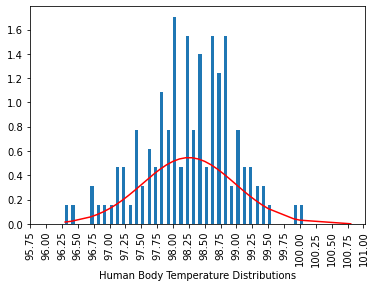

Average (Mu): 98.24923076923078 / Standard Deviation: 0.730357778905038


In [30]:
import numpy as np
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt

observed_temperatures = df['Temperature'].sort_values()
bins = np.arange(start=observed_temperatures.min(), stop=observed_temperatures.max(), step=.05)
mu, std = np.mean(observed_temperatures), np.std(observed_temperatures)

p = norm.pdf(observed_temperatures,loc = mu, scale = std)

plt.hist(observed_temperatures, bins=bins, density=True, stacked=True)
plt.plot(observed_temperatures,p,color='red')
plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.xlabel('Human Body Temperature Distributions')
plt.show()

print('Average (Mu): {} / Standard Deviation: {}'.format(mu,std))


#### 看起来还可以, 让我们再来检验一下

Shapiro-Wilk Stat: 0.9865769743919373  Shapiro-Wilk p-Value: 0.2331680953502655
k2:  2.703801433319236  p:  0.2587479863488212


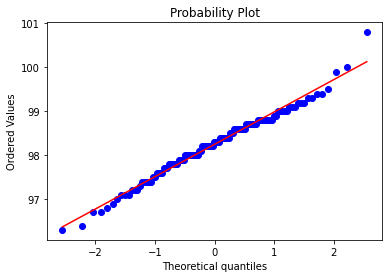

In [31]:
x = observed_temperatures

# 第一种正太检验的方法: Shapiro-Wilk Test 
shapiro_stat, shapiro_p = scipy.stats.shapiro(x)
print('Shapiro-Wilk Stat:',shapiro_stat,' Shapiro-Wilk p-Value:',shapiro_p)

# 第二种正太检验的方法
k2,p = scipy.stats.normaltest(x)
print('k2: ',k2,' p: ',p)

# 第三种正太检验方法QQ图
scipy.stats.probplot(x, dist='norm', plot=pylab)
pylab.show()

#### 有学者提出98.6是人类的平均体温, 我们该这样认为吗?
##### 在这里我们选择t检验, 因为我们只能计算样本的标准差

In [32]:
from scipy import stats

CW_mu = 98.6
stats.ttest_1samp(df['Temperature'], CW_mu, axis=0)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [34]:
female_temp = df.Temperature[df.Gender == 2]
male_temp = df.Temperature[df.Gender == 1]

stats.ttest_ind(female_temp, male_temp, axis=0)

Ttest_indResult(statistic=2.2854345381654984, pvalue=0.02393188312240236)